In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
store = pd.read_csv("/kaggle/input/rossmann-store-sales/store.csv")
train = pd.read_csv("/kaggle/input/rossmann-store-sales/train.csv", low_memory = False, parse_dates = True, index_col = "Date")

train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

# 1. 기술통계 및 추정

### 1) 데이터셋의 전체 구조 파악

- Sales: 하루동안 번 금액 (target).
- Customers: 하루동안 방문한 고객 수.
- Open: 가게의 오픈 상태: 0 = closed, 1 = open.
- Promo: 행사를 진행했는지에 대한 여부
- StateHoliday: 공휴일 여부 (대부분의 가게는 문을 닫음)
- SchoolHoliday: 공립학교의 쉬는 날로 영향을 받았는지에 대한 여부

In [3]:
print(train.shape)

train.head(10)

(1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
2015-07-31,6,5,5651,589,1,1,0,1
2015-07-31,7,5,15344,1414,1,1,0,1
2015-07-31,8,5,8492,833,1,1,0,1
2015-07-31,9,5,8565,687,1,1,0,1


In [4]:
print(store.shape)

store.head(10)

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [6]:
train["StateHoliday"].value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [7]:
train["Year"] = train.index.year
train["Month"] = train.index.month
train["Day"] = train.index.day

train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [8]:
train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

### 2) 기술 통계량 계산

In [9]:
round(train.describe(), 2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,SalePerCustomer
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,844340.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18,2013.83,5.85,15.70,9.49
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38,0.78,3.33,8.79,2.20
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,2013.00,1.00,1.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,2013.00,3.00,8.00,7.90
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,2014.00,6.00,16.00,9.25
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,2014.00,8.00,23.00,10.90
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00,2015.00,12.00,31.00,64.96


In [10]:
round(store.describe(), 2)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,761.00,1115.00,571.00,571.00
mean,558.00,5404.90,7.22,2008.67,0.51,23.60,2011.76
std,322.02,7663.17,3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,279.50,717.50,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,2325.00,8.00,2010.00,1.00,22.00,2012.00
75%,836.50,6882.50,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


### 3) 데이터 분포 탐색

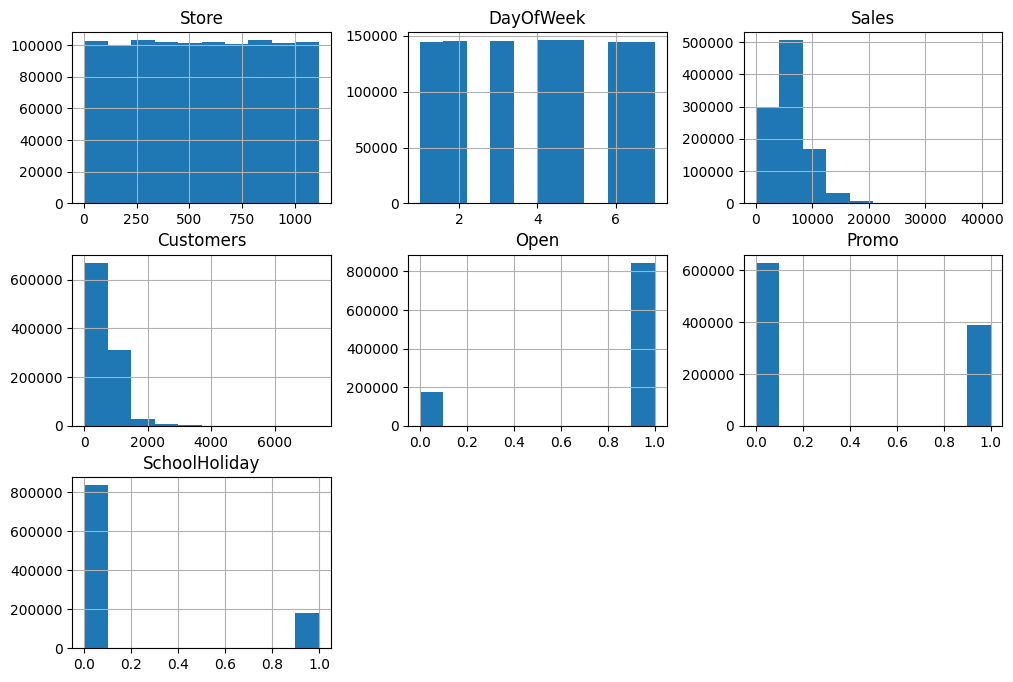

In [11]:
selected = ["Store", "DayOfWeek", "Sales", "Customers", "Open", "Promo", "SchoolHoliday"]

train[selected].hist(figsize=(12, 8));

In [12]:
train["Sales_log"] = np.log1p(train["Sales"])
train["Customers_log"] = np.log1p(train["Customers"])

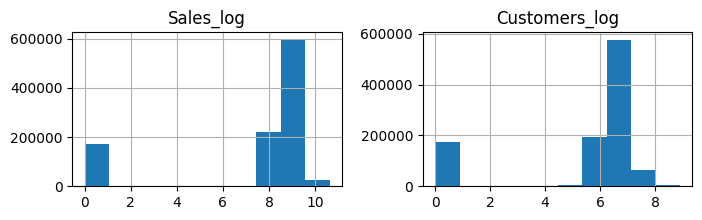

In [13]:
train[["Sales_log", "Customers_log"]].hist(figsize=(8, 2));
train[["Customers_log"]].hist(figsize=(8, 2));

In [14]:
train_trans = train.drop(["Sales", "Customers"], axis=1)

train_trans.head(3)

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,SalePerCustomer,Sales_log,Customers_log
Date,,,,,,,,,,,,
2015-07-31,1,5,1,1,0,1,2015,7,31,9.482883,8.568646,6.320768
2015-07-31,2,5,1,1,0,1,2015,7,31,9.702400,8.710290,6.439350
2015-07-31,3,5,1,1,0,1,2015,7,31,10.126675,9.025816,6.711740


In [15]:
print("Sales Skewness:", train_trans['Sales_log'].skew())
print("Sales Kurtosis:", train_trans['Sales_log'].kurt(), "\n")

print("Customers Skewness:", train_trans['Customers_log'].skew())
print("Customers Kurtosis:", train_trans['Customers_log'].kurt())

Sales Skewness: -1.7033487946550365
Sales Kurtosis: 0.9949010255137565 

Customers Skewness: -1.653469449522087
Customers Kurtosis: 0.9166435089344644


In [16]:
int_columns = train_trans.select_dtypes(include="int64")

desc = int_columns.describe()
desc["var"] = int_columns.var()

round(desc, 2)

,Store,DayOfWeek,Open,Promo,SchoolHoliday,var
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,NaN
mean,558.43,4.0,0.83,0.38,0.18,NaN
std,321.91,2.0,0.38,0.49,0.38,NaN
min,1.00,1.0,0.00,0.00,0.00,NaN
25%,280.00,2.0,1.00,0.00,0.00,NaN
50%,558.00,4.0,1.00,0.00,0.00,NaN
75%,838.00,6.0,1.00,1.00,0.00,NaN
max,1115.00,7.0,1.00,1.00,1.00,NaN


### 4) 이상치 탐색 및 처리

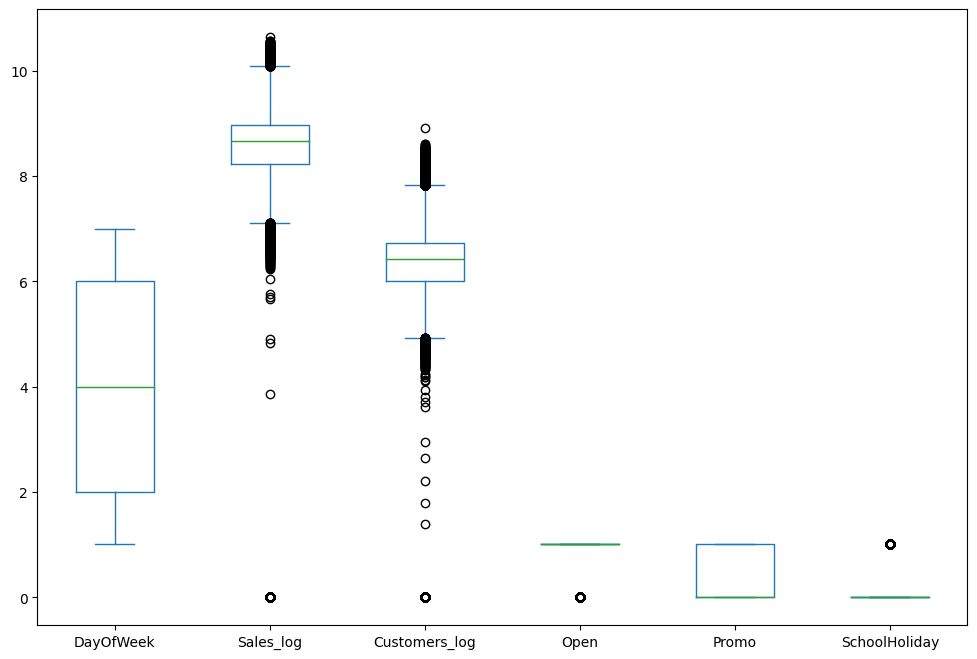

In [17]:
selected = ["DayOfWeek", "Sales_log", "Customers_log", "Open", "Promo", "SchoolHoliday"]
train_trans[selected].plot.box(figsize=(12, 8));

##### BoxPlot을 통해 확인해본 결과, sales 값에 0이 많이 분포해있는 것을 확인하였습니다. 이를 전처리 해줍니다.

In [18]:
# 가게를 열었는데, 물건이 팔리지 않은 경우
train_trans[(train_trans["Open"] != 0) & (train_trans["Sales_log"] == 0)].head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,SalePerCustomer,Sales_log,Customers_log
Date,,,,,,,,,,,,
2015-05-15,971,5,1,0,0,1,2015,5,15,NaN,0.0,0.0
2015-03-26,674,4,1,0,0,0,2015,3,26,NaN,0.0,0.0
2015-02-05,699,4,1,1,0,0,2015,2,5,NaN,0.0,0.0
2014-10-01,708,3,1,1,0,0,2014,10,1,NaN,0.0,0.0
2014-09-22,357,1,1,0,0,0,2014,9,22,NaN,0.0,0.0


예측하는 데에 큰 의미가 없을 것이라고 판단되는
가게를 열지 않았거나, 물건이 판매되지 않은 경우를 모두 함께 제거해줍니다.

In [19]:
train_trans = train_trans[(train_trans["Open"] != 0) & (train_trans["Sales_log"] != 0)]

train.shape, train_trans.shape

((1017209, 14), (844338, 12))

In [20]:
Q1 = train_trans["Sales_log"].quantile(0.25)
Q3 = train_trans["Sales_log"].quantile(0.75)
IQR = Q3 - Q1

condition_sa = (train_trans["Sales_log"] > Q3 + 2*IQR) | (train_trans["Sales_log"] < Q1 - 2*IQR)

train_trans[condition_sa]["Sales_log"]

Date
2015-07-31    10.157160
2015-07-31    10.137808
2015-07-31    10.222269
2015-07-29    10.159718
2015-07-28    10.147179
                ...    
2013-01-03     7.338888
2013-01-03     7.393878
2013-01-02     7.089243
2013-01-02     7.246368
2013-01-02    10.140850
Name: Sales_log, Length: 3331, dtype: float64

In [21]:
Q1 = train_trans["Customers_log"].quantile(0.25)
Q3 = train_trans["Customers_log"].quantile(0.75)
IQR = Q3 - Q1

condition_cu = (train_trans["Customers_log"] > Q3 + 2*IQR) | (train_trans["Customers_log"] < Q1 - 2*IQR)

train_trans[condition_cu]["Customers_log"]

Date
2015-07-31    8.207947
2015-07-31    8.088255
2015-07-31    8.201112
2015-07-31    7.973155
2015-07-31    8.197263
                ...   
2013-01-02    7.917536
2013-01-02    8.046229
2013-01-02    8.149891
2013-01-02    8.132119
2013-01-01    7.964156
Name: Customers_log, Length: 7955, dtype: float64

In [22]:
train_trans[condition_sa & condition_cu].count()

Store              2029
DayOfWeek          2029
Open               2029
Promo              2029
StateHoliday       2029
SchoolHoliday      2029
Year               2029
Month              2029
Day                2029
SalePerCustomer    2029
Sales_log          2029
Customers_log      2029
dtype: int64

In [23]:
print(train_trans[(train_trans["Customers_log"] > Q3 + 1.5*IQR) & (train_trans["Sales_log"] > Q3 + 1.5*IQR)].shape)
print(train_trans[(train_trans["Sales_log"] < Q1 - 1.5*IQR) & (train_trans["Customers_log"] < Q1 - 1.5*IQR)].shape)

(14412, 12)
(3, 12)


customer가 많으면, 판매량도 비례해서 증가하는 것은 당연한 것이라 생각하여, 이상치 범위를 1.5 * IQR에서 3 * IQR로 변경하여 제거해주었습니다.

In [24]:
train_trans = train_trans[~condition_sa | ~condition_cu]
train_trans.shape

(842309, 12)

### 5) 결측치 탐색 및 처리

In [25]:
train.isna().sum()

Store                   0
DayOfWeek               0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
Day                     0
SalePerCustomer    172869
Sales_log               0
Customers_log           0
dtype: int64

In [26]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [27]:
store["CompetitionDistance"] = store["CompetitionDistance"].fillna(store["CompetitionDistance"].median())

In [28]:
store[store["Promo2SinceWeek"].isna()].head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [29]:
store[store["CompetitionOpenSinceYear"].isna()].head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN


In [30]:
store[(store["CompetitionOpenSinceYear"].isna()) & (store["Promo2SinceWeek"].isna())].count()

Store                        148
StoreType                    148
Assortment                   148
CompetitionDistance          148
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                       148
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [31]:
store[(store["CompetitionOpenSinceYear"].isna()) & (store["Promo2SinceWeek"].isna())]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
25,26,d,a,2300.0,NaN,NaN,0,NaN,NaN,NaN
28,29,d,c,2170.0,NaN,NaN,0,NaN,NaN,NaN
61,62,a,a,2050.0,NaN,NaN,0,NaN,NaN,NaN
69,70,c,c,4840.0,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1063,1064,a,c,420.0,NaN,NaN,0,NaN,NaN,NaN
1065,1066,a,a,3350.0,NaN,NaN,0,NaN,NaN,NaN
1090,1091,a,c,9990.0,NaN,NaN,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


각각 Competition과 Promo2와 연관된 변수 끼리는 함께 결측값으로 존재한다는 점을 알게 되었습니다.
따라서, 아래와 같이 결측치 처리를 진행했습니다.

- 두 관련 변수 모두 결측치로 보유한 경우 : 행 제거
- 둘 중 하나의 변수만 결측치로 존재하는 경우 : 0으로 값 대체

In [32]:
store[["CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]] = store[["CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]].fillna(0)
store[["Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]] = store[["Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]].fillna(0)

In [33]:
store = store.dropna(subset=["CompetitionOpenSinceYear", "Promo2SinceWeek"])

In [34]:
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### 6) 변수간 상관관계 분석

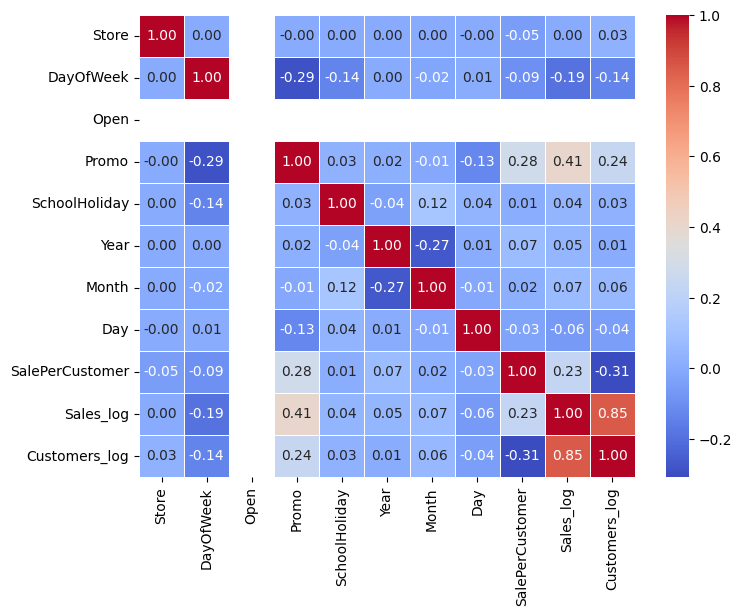

In [35]:
corr_train = train_trans.select_dtypes(include='number').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_train, annot = True, cmap = "coolwarm", fmt=".2f", linewidths=.5);

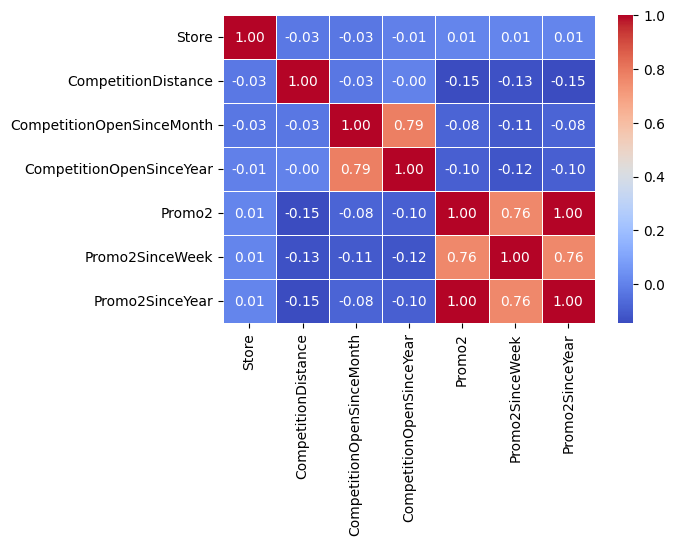

In [36]:
corr_store = store.select_dtypes(include='number').corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_store, annot = True, cmap = "coolwarm", fmt=".2f", linewidths=.5);

### 7) 시각화를 통한 데이터 탐색

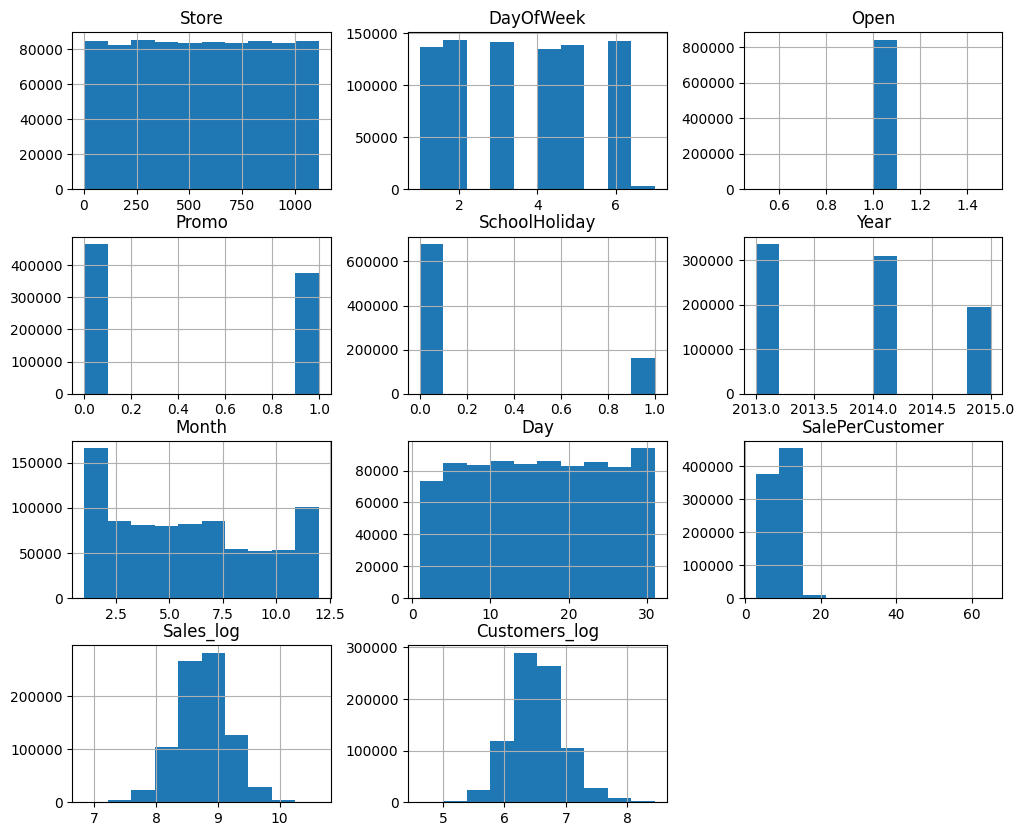

In [37]:
train_trans.select_dtypes(include = "number").hist(figsize=(12, 10));

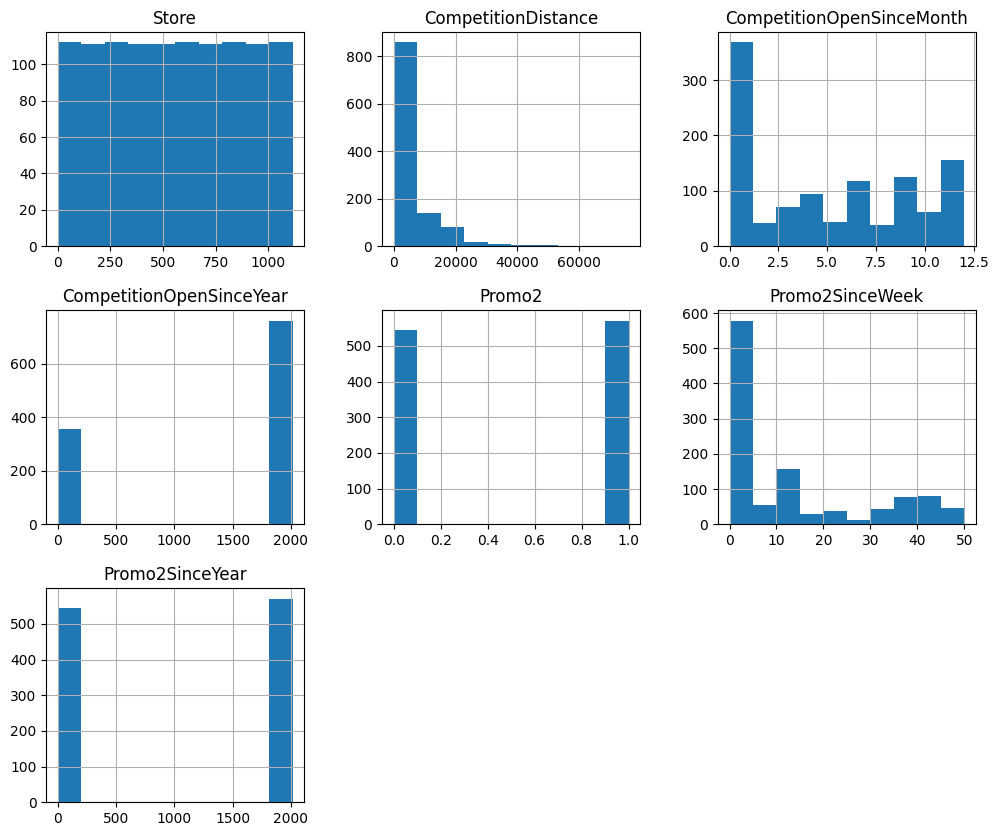

In [38]:
store.select_dtypes(include = "number").hist(figsize=(12, 10));

In [39]:
train_store = pd.merge(train_trans, store, how='inner', on='Store')
train_store.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,SalePerCustomer,...,Customers_log,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,1,1,0,1,2015,7,31,9.482883,...,6.320768,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,1,1,0,1,2015,7,31,9.702400,...,6.439350,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,1,1,0,1,2015,7,31,10.126675,...,6.711740,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,1,1,0,1,2015,7,31,9.342457,...,7.312553,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,1,1,0,1,2015,7,31,8.626118,...,6.327937,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [40]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,455421.0,8.744193,0.444689,6.831954,8.457018,8.746875,9.036701,10.634701
b,15366.0,9.093979,0.495390,7.133296,8.751989,9.111900,9.471338,10.115449
c,112826.0,8.765147,0.399710,6.956545,8.501318,8.765927,9.030256,10.248601
d,258696.0,8.763363,0.360620,7.185387,8.527539,8.763428,9.002701,10.546341


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

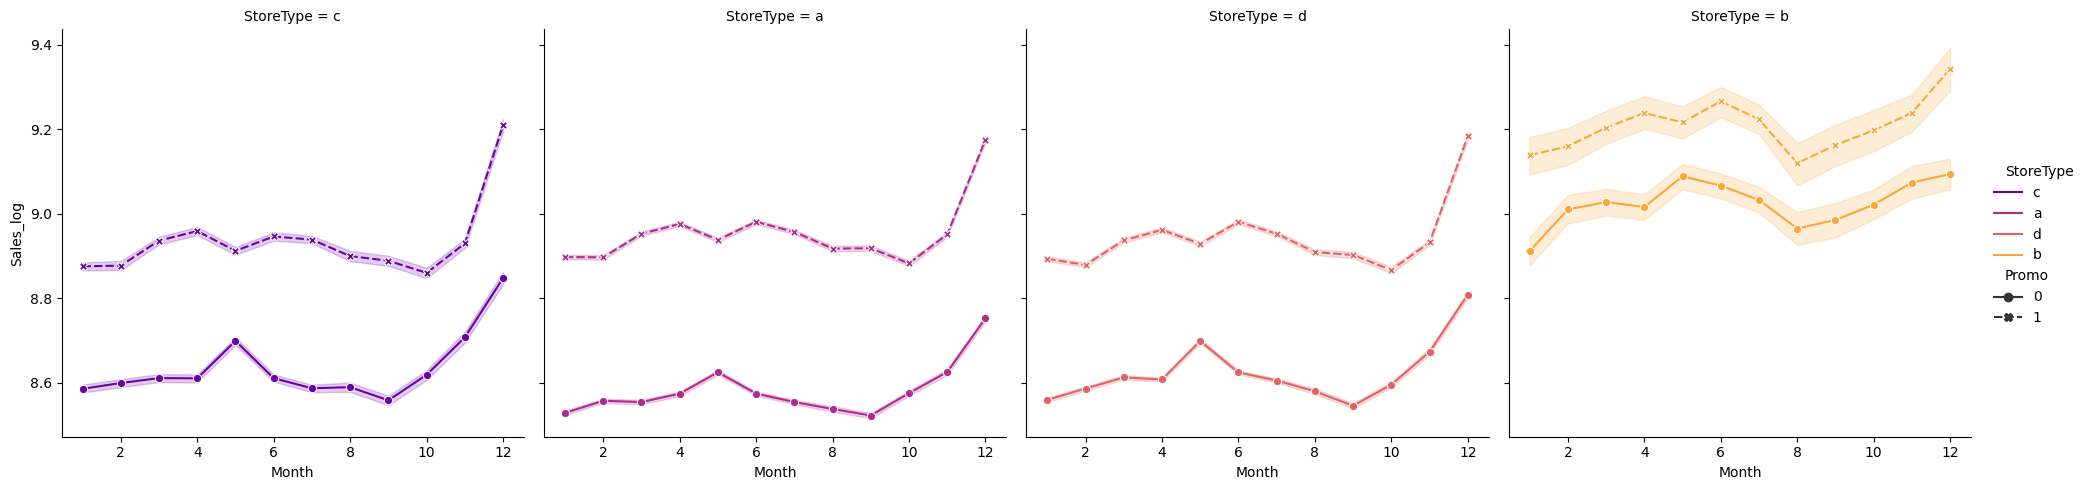

In [41]:
sns.relplot(data=train_store, x='Month', y='Sales_log', 
            col='StoreType', hue='StoreType', style='Promo', kind='line', markers=True, dashes=True, palette='plasma')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

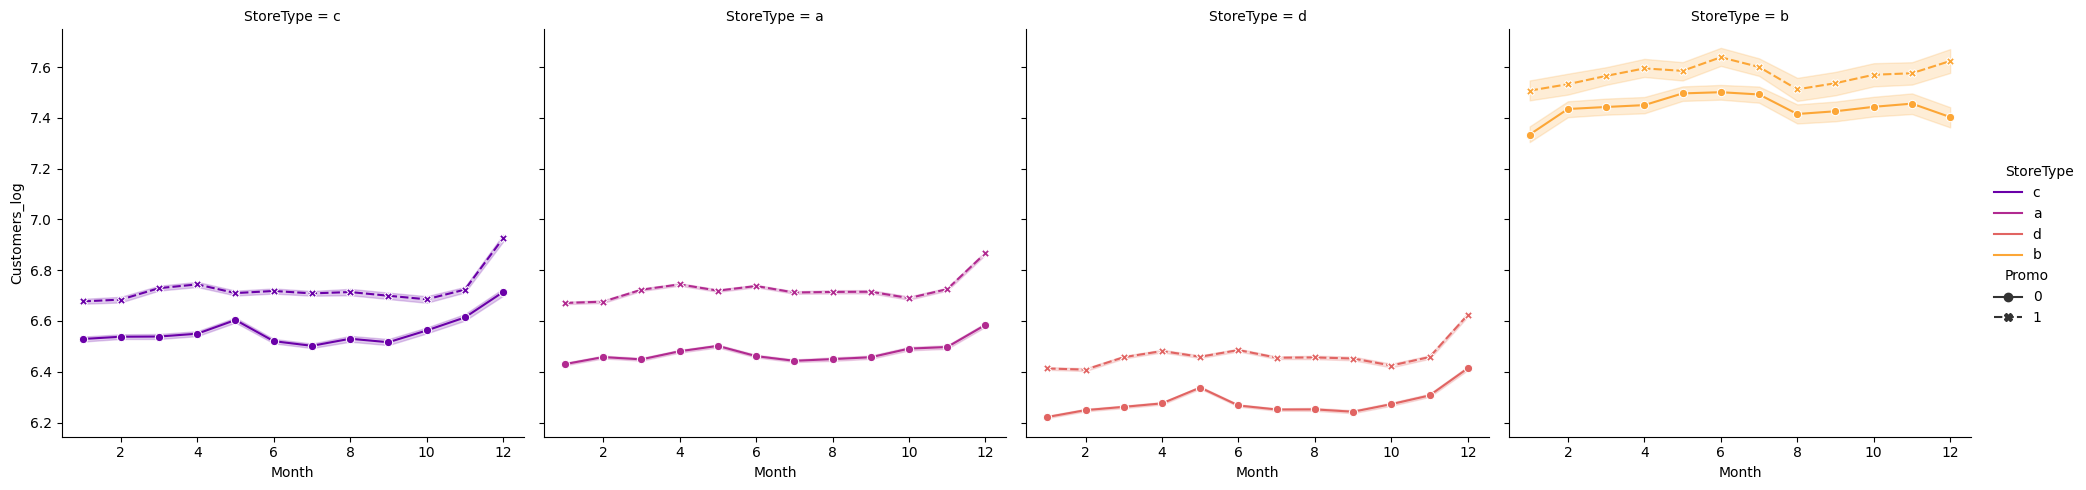

In [42]:
sns.relplot(data=train_store, x='Month', y='Customers_log', 
            col='StoreType', hue='StoreType', style='Promo', kind='line', markers=True, dashes=True, palette='plasma')
plt.show()

## 2. 추정
### 1) 모집단의 특성 추정 (신뢰구간 계산)

In [43]:
from scipy import stats
numeric_train = train_trans.select_dtypes(include="number")

confidence_interval = stats.norm.interval(0.95, loc=numeric_train.mean(), scale=numeric_train.std()/np.sqrt(numeric_train.shape[0]))
pd.DataFrame(confidence_interval, columns = numeric_train.columns)

/opt/conda/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/opt/conda/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Store,DayOfWeek,Open,Promo,SchoolHoliday,Year,Month,Day,SalePerCustomer,Sales_log,Customers_log
0,557.628911,3.513402,NaN,0.445827,0.192952,2013.830408,5.838805,15.816634,9.491764,8.758375,6.535808
1,559.003358,3.520755,NaN,0.447950,0.194640,2013.833727,5.852999,15.853720,9.501153,8.760161,6.537656


### 2) 표본 크기 결정

- 효과 크기, 유의수준, 검정력을 고려하여 표본 크기를 결정

In [44]:
import statsmodels.stats.power as smp

effect_size = 0.5
alpha = 0.05
power = 0.8

sample_size = smp.tt_ind_solve_power(effect_size, alpha=alpha, power=power, alternative='two-sided')
print("Required Sample Size:", round(sample_size))

Required Sample Size: 64


### 3) 추정 오차 분석
- 이 부분은 회귀 분석 이후에 진행하도록 합니다.

## 3. 검정

### 1) 가설설정
- 귀무가설 : promotion의 존재 여부가 Sales_log값에 영향을 주지 않을 것이다.
- 대립가설 : promotion의 존재 여부가 Sales_log값에 영향을 줄 것이다.

### 2) ANOVA TEST 진행

In [45]:
from scipy.stats import f_oneway

grouped_data = [train_trans[train_trans['Promo'] == 1]["Sales"], train_trans[train_trans['Promo'] == 0]["Sales"]]

f_score, p_value = f_oneway(*grouped_data)

In [46]:
print(f'F-score: {f_score}')
print('P-value: %.5f'%p_value)

F-score: 166064.38778276136
P-value: 0.00000


### 3) 검정의 유의성 평가

one-way ANOVA 검정을 통해 얻은 결과로 F-score는 166064, 유의수준은 0.0으로 귀무가설을 기각하고 대립가설을 채택할 수 있게 되었다.

이것이 의미하는 바는 Promotion을 진행할 수록 판매 실적이 상승한다는 점이다. 그러면 반대로 Promotion과 Customer의 관계를 살펴보고자 한 번 더 검정을 진행해보았다.

In [47]:
grouped_data = [train_trans[train_trans['Promo'] == 1]["Customers_log"], train_trans[train_trans['Promo'] == 0]["Customers_log"]]

f_score, p_value = f_oneway(*grouped_data)

In [48]:
print(f'F-score: {f_score}')
print('P-value: %.5f'%p_value)

F-score: 53149.49719613651
P-value: 0.00000


In [49]:
# ANOVA로 하니까 너무 오래 걸려서 독립 t 검정으로 진행하였습니다.
from scipy.stats import ttest_ind

result, p_value = ttest_ind(train_trans["Customers_log"], train_trans["Sales_log"])

In [50]:
print(f'T-score: {result}')
print('P-value: %.5f'%p_value)

T-score: -3389.697025749854
P-value: 0.00000


Customers도 동일하게 promotion이 진행됨에 따라 증가함을 볼 수 있었다.

따라서 Promotion에 두 변수가 의미있는 영향을 받는다는 것을 알게 되었으며, 이는 회귀분석을 진행하면서 고려해야될 사항 중 하나이다.

## 4. 회귀분석

### 1) 회귀 모델 선택

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
train_store.index = train_trans.index

In [102]:
train.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day',
       'SalePerCustomer', 'Sales_log', 'Customers_log'],
      dtype='object')

In [103]:
select_columns = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday','SchoolHoliday']

In [129]:
X = train_store.select_dtypes(include="number").drop(["Sales_log"], axis=1)
#X = train_store[select_columns]
y = train_store["Sales_log"]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

In [132]:
X_train_ols = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_ols).fit()

In [133]:
X_test_ols = sm.add_constant(X_test)
y_pred_ols = model_ols.predict(X_test_ols)

In [134]:
r2_score(y_test, y_pred_ols)

0.9906814830648055

In [61]:
def rmspe(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred) + 1
    percentage_error = (y_true - y_pred) / y_true
    rmspe = np.sqrt(np.mean(percentage_error**2))
    return rmspe

In [135]:
rmspe_value = rmspe(y_test, y_pred_ols)
print("RMSPE:", rmspe_value)

RMSPE: 0.11468376124032457


<Axes: xlabel='Sales_log'>

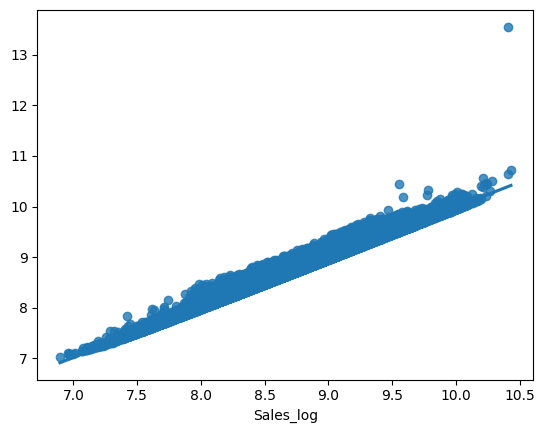

In [136]:
sns.regplot(x=y_test, y=y_pred)

In [137]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              Sales_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.573e+06
Date:                Sun, 04 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:34:58   Log-Likelihood:             1.1920e+06
No. Observations:              673847   AIC:                        -2.384e+06
Df Residuals:                  673831   BIC:                        -2.384e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Store                 

r계수가 거의 1에 가까운 수치를 보여주는 것을 알 수 있습니다.

선형회귀 모델이 예측한 선분이 실제 test set에서도 설명력이 높은 것을 보여주는 것을 알 수 있습니다.

뿐만 아니라, 해당 케글 대회에서 계산되는 RMSPE 수치도 0.11의 수준으로 크지 않은 것을 보여주었습니다.

이를 바탕으로 모델이 적합하다는 점을 알 수 있었습니다.

### 4) 다중공산성 진단

VIF를 통해 다중공산성을 비교 및 확인해보았습니다.

In [138]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_ols.columns
vif_data["VIF"] = [round(variance_inflation_factor(X_train_ols.values, i), 2) for i in range(X_train_ols.shape[1])]

print(vif_data)

                     Variable         VIF
0                       Store        1.01
1                   DayOfWeek        1.12
2                        Open  7314230.56
3                       Promo        1.34
4               SchoolHoliday        1.04
5                        Year        1.09
6                       Month        1.10
7                         Day        1.02
8             SalePerCustomer        1.42
9               Customers_log        1.34
10        CompetitionDistance        1.11
11  CompetitionOpenSinceMonth        2.63
12   CompetitionOpenSinceYear        2.63
13                     Promo2   793562.67
14            Promo2SinceWeek        2.55
15            Promo2SinceYear   793013.43


Promo2, Promo2SinceYear, Open의 독립 변수는 상호 의존성이 높은 것을 알 수 있었습니다.

따라서 후에 해당 변수를 제거하고 확인하는 등의 추가적인 업무가 더욱 필요할 것입니다.